# **LinkedIn Job Trend Analysis**

Analyze job posting trends across cities and roles based on skills.

In [3]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [4]:
# Load Data
df = pd.read_csv('Job_Postings.csv')
df.head()

,Job Title,Skills,City
0,Data Analyst,"Python, SQL, Excel",Bangalore
1,Data Scientist,"Python, ML, Statistics",Mumbai
2,Frontend Dev,"HTML, CSS, JavaScript",Delhi
3,Backend Dev,"Python, Django, REST API",Chennai
4,AI Engineer,"Python, TensorFlow, NLP",Hyderabad


## **Clean and Parse Skill Tags**

In [5]:
# Convert skills to list
df['Skill List'] = df['Skills'].apply(lambda x: [skill.strip() for skill in str(x).split(',')])

# Flatten all skills for top 10
all_skills = [skill for sublist in df['Skill List'] for skill in sublist]
top_skills = [skill for skill, count in Counter(all_skills).most_common(10)]
top_skills

['Python',
 'Docker',
 'SQL',
 'Excel',
 'ML',
 'Statistics',
 'HTML',
 'CSS',
 'JavaScript',
 'Django']

## **One-Hot Encode Top Skills for Analysis**

In [6]:
# Create binary columns for top skills
for skill in top_skills:
    df[skill] = df['Skill List'].apply(lambda x: int(skill in x))
df.head()

,Job Title,Skills,City,Skill List,Python,Docker,SQL,Excel,ML,Statistics,HTML,CSS,JavaScript,Django
0,Data Analyst,"Python, SQL, Excel",Bangalore,"[Python, SQL, Excel]",1,0,1,1,0,0,0,0,0,0
1,Data Scientist,"Python, ML, Statistics",Mumbai,"[Python, ML, Statistics]",1,0,0,0,1,1,0,0,0,0
2,Frontend Dev,"HTML, CSS, JavaScript",Delhi,"[HTML, CSS, JavaScript]",0,0,0,0,0,0,1,1,1,0
3,Backend Dev,"Python, Django, REST API",Chennai,"[Python, Django, REST API]",1,0,0,0,0,0,0,0,0,1
4,AI Engineer,"Python, TensorFlow, NLP",Hyderabad,"[Python, TensorFlow, NLP]",1,0,0,0,0,0,0,0,0,0


## **Heatmap of Top Skills by City**

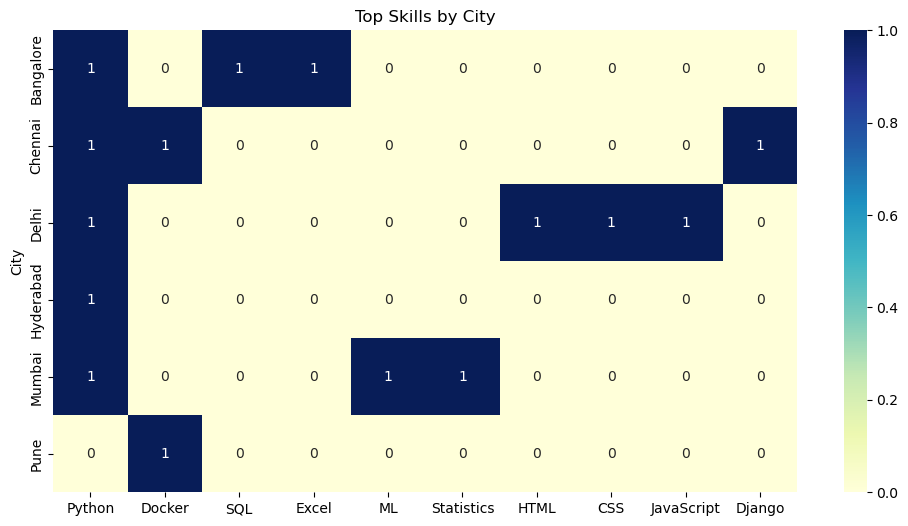

In [7]:
city_skill_matrix = df.groupby('City')[top_skills].sum()
plt.figure(figsize=(12, 6))
sns.heatmap(city_skill_matrix, annot=True, cmap='YlGnBu')
plt.title('Top Skills by City')
plt.show()

## **Skill vs Role Matrix**

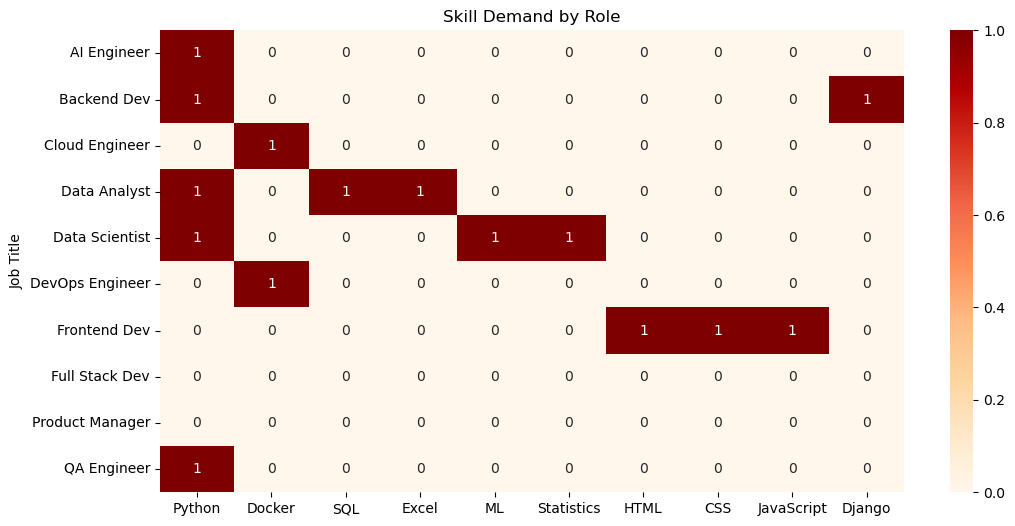

In [8]:
role_skill_matrix = df.groupby('Job Title')[top_skills].sum()
plt.figure(figsize=(12, 6))
sns.heatmap(role_skill_matrix, annot=True, cmap='OrRd')
plt.title('Skill Demand by Role')
plt.show()

## **Job Demand Recommendation by Skill**

In [9]:
def recommend_by_skill(skill):
    if skill not in df.columns:
        return f"Skill '{skill}' not in top 10 tracked skills."
    top_cities = df[df[skill]==1]['City'].value_counts().head(3)
    top_roles = df[df[skill]==1]['Job Title'].value_counts().head(3)
    return top_cities, top_roles

# Example: Recommendation for 'Python'
recommend_by_skill('Python')

(City
 Bangalore    1
 Mumbai       1
 Chennai      1
 Name: count, dtype: int64,
 Job Title
 Data Analyst      1
 Data Scientist    1
 Backend Dev       1
 Name: count, dtype: int64)